# Brief notebook to examine the detections from the SR model images

In [237]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from photutils.segmentation import SourceCatalog
from photutils import SegmentationImage
import quicklook as jql
import jades_photutils_interface as jpui
import time
import os

### Paths to HST & SR .fit.output.fits files

In [238]:

analysis_dir = "/Users/samuelkahn/Desktop/Astro - Deep Learning/Brants Group/hsc_hst_data/src/hubble-pix2pix/analysis/results"
hst_path = os.listdir(os.path.join(analysis_dir,"hst_results"))
sr_path = os.listdir(os.path.join(analysis_dir,"sr_results"))

### Create HST & SR catalogs from validation samples (modified from Brant's Notebook)

In [204]:
columns = ['xcentroid','ycentroid','area','semimajor_sigma','semiminor_sigma','orientation','eccentricity','min_value','max_value', 'segment_flux', 'kron_flux','kron_radius','gini','fwhm','cxx','cxy','cyy']
# Lists to store tables 
hst_tbls = []
sr_tbls = []

for hst_file in hst_path:
    sr_file = hst_file.replace("hst","sr")
    
    fname_hst = f'/Users/samuelkahn/Desktop/Astro - Deep Learning/Brants Group/hsc_hst_data/src/hubble-pix2pix/analysis/results/hst_results/{hst_file}'
    data_hst, segm_hst_data, cdata_hst = jpui.ReadSourceCatalogImages(fname_hst)
    segm_hst = SegmentationImage(segm_hst_data) #hst segmap
    cat_hst = SourceCatalog(data_hst, segm_hst, convolved_data=cdata_hst)
    tbl_hst = cat_hst.to_table(columns=columns) #create hst table
    hst_tbls.append(tbl_hst)
    
    fname_sr = f'/Users/samuelkahn/Desktop/Astro - Deep Learning/Brants Group/hsc_hst_data/src/hubble-pix2pix/analysis/results/sr_results/{sr_file}'
    data_sr, segm_sr_data, cdata_sr = jpui.ReadSourceCatalogImages(fname_sr)
    segm_sr = SegmentationImage(segm_sr_data) #sr segmap
    cat_sr = SourceCatalog(data_sr, segm_sr, convolved_data=cdata_sr)
    tbl_sr  = cat_sr.to_table(columns=columns) #create sr table
    sr_tbls.append(tbl_sr)



/Users/samuelkahn/Desktop/Astro - Deep Learning/Brants Group/hsc_hst_data/src/training-srresnet/srgan-hubble/lib/python3.9/site-packages/photutils/segmentation/catalog.py:2083: RuntimeWarning: invalid value encountered in double_scalars
  gini.append(np.sum(kernel) / normalization)
/Users/samuelkahn/Desktop/Astro - Deep Learning/Brants Group/hsc_hst_data/src/training-srresnet/srgan-hubble/lib/python3.9/site-packages/photutils/segmentation/catalog.py:2083: RuntimeWarning: invalid value encountered in double_scalars
  gini.append(np.sum(kernel) / normalization)
/Users/samuelkahn/Desktop/Astro - Deep Learning/Brants Group/hsc_hst_data/src/training-srresnet/srgan-hubble/lib/python3.9/site-packages/photutils/segmentation/catalog.py:2083: RuntimeWarning: invalid value encountered in double_scalars
  gini.append(np.sum(kernel) / normalization)
/Users/samuelkahn/Desktop/Astro - Deep Learning/Brants Group/hsc_hst_data/src/training-srresnet/srgan-hubble/lib/python3.9/site-packages/photutils/segm

### VStack tables into single table

In [228]:
from astropy.table import vstack, Table
hst_stacked = vstack(hst_tbls)
sr_stacked = vstack(sr_tbls)

# hst_stacked = hst_stacked[np.argsort(-1*hst_stacked[:]['segment_flux'])]
# sr_stacked  = sr_stacked[np.argsort(-1*sr_stacked[:]['segment_flux'])]


### Make some comparison plots (from Brant's notebook) 

Text(0, 0.5, 'SR Flux')

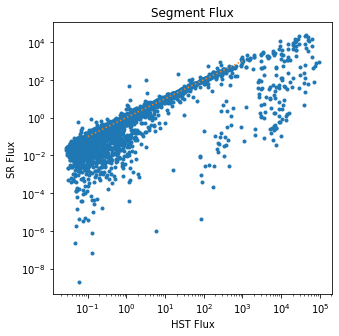

In [229]:
from sklearn.metrics import r2_score
f=plt.figure(figsize=(5,5))
plt.plot( hst_stacked[:]['segment_flux'],sr_stacked[:]['segment_flux'],'.')

x = 10**(np.linspace(-1,3,100))
y = x.copy()
plt.plot(x,y,':')

plt.title("Segment Flux")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('HST Flux')
plt.ylabel('SR Flux')
# plt.annotate("r-squared = {:.3f}".format(r2_score(hst_stacked[:]['segment_flux'], sr_stacked[:]['segment_flux'])), (.1, .1))

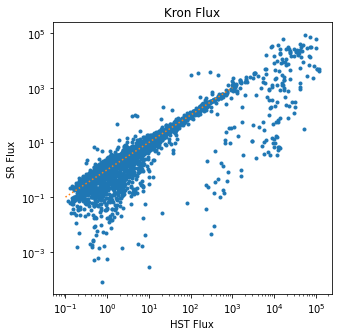

In [230]:
f=plt.figure(figsize=(5,5))
plt.plot( hst_stacked[:]['kron_flux'],sr_stacked[:]['kron_flux'],'.')

x = 10**(np.linspace(-1,3,100))
y = x.copy()
plt.plot(x,y,':')

plt.title("Kron Flux")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('HST Flux');
plt.ylabel('SR Flux');


(1, 10)

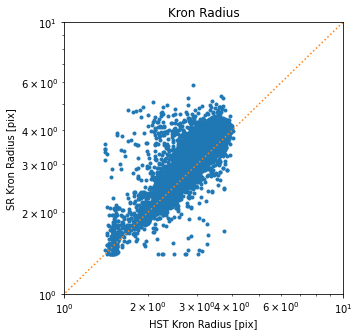

In [155]:
f=plt.figure(figsize=(5,5))
plt.plot( hst_stacked[:]['kron_radius'],sr_stacked[:]['kron_radius'],'.')

x = 10**(np.linspace(-1,3,100))
y = x.copy()
plt.plot(x,y,':')

plt.title("Kron Radius")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('HST Kron Radius [pix]');
plt.ylabel('SR Kron Radius [pix]');
plt.xlim([1,10])
plt.ylim([1,10])

(0.01, 1.5)

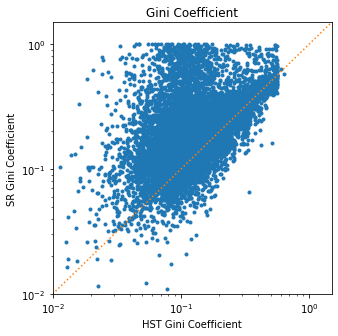

In [156]:
f=plt.figure(figsize=(5,5))
plt.plot( hst_stacked[:]['gini'],sr_stacked[:]['gini'],'.')

x = 10**(np.linspace(-2,3,100))
y = x.copy()
plt.plot(x,y,':')

plt.title("Gini Coefficient")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('HST Gini Coefficient');
plt.ylabel('SR Gini Coefficient');
plt.xlim([1e-2,1.5])
plt.ylim([1e-2,1.5])

In [158]:
np.median(hst_stacked[:]['kron_flux']-sr_stacked[:]['kron_flux'])

-0.11784771330428348